In [2]:
import requests

from matplotlib import pyplot as plt
from astropy.time import Time
import numpy as np

In [3]:
T0 = "2023-05-18T12:59:08.000000"

In [4]:
T0_ijd = Time(T0, format='isot', scale='utc').mjd - 51544

In [5]:
# r = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/rtlc/{T0}/200?json")

r = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/genlc/ACS/{T0}/200?json")



In [22]:
# data = np.array(r.json()['data'])

import pandas as pd
from io import BytesIO


d = pd.read_csv(BytesIO(r.content), delim_whitespace=True, skiprows=5, names=['ijd', 'trel', 'counts'], index_col=False)

data = np.vstack([d.counts, d.ijd]).T

data


/tmp/ipykernel_710568/1277354741.py:7: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  d = pd.read_csv(BytesIO(r.content), delim_whitespace=True, skiprows=5, names=['ijd', 'trel', 'counts'], index_col=False)


array([[4500.        , 8538.53955088],
       [4404.        , 8538.53955146],
       [4444.        , 8538.53955204],
       ...,
       [4398.        , 8538.54417878],
       [4468.        , 8538.54417936],
       [4400.        , 8538.54417994]])

4378.945739396256
[-103.90352859  -95.30352322  -47.50349818  -47.40349763  -42.80349413
  -31.50348942    0.44653091   98.24658429  105.74658934  129.54660138
  166.19662309  207.74664619  221.44665408  232.54665846  251.29666866
  256.19667399]


Text(0.5, 1.0, 'SPI-ACS realtime data, preliminary')

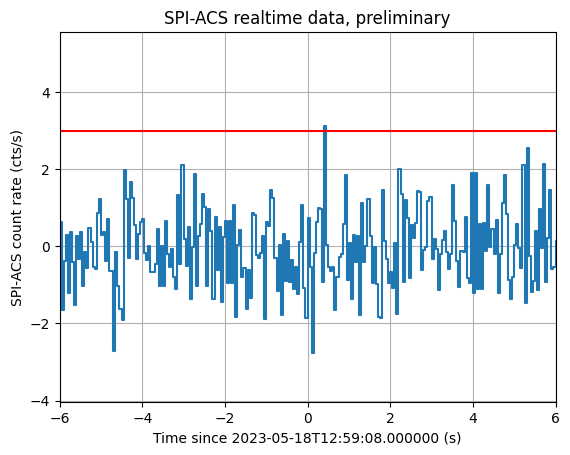

In [39]:
# plt.p


bkg = np.nanmean(data[:, 0][data[:, 1] < T0_ijd])
bkgstd = np.nanstd(data[:, 0][data[:, 1] < T0_ijd])

t_rel_s = (data[:, 1] - T0_ijd)*24*3600

print(bkg)
snr = (data[:, 0] - bkg)/bkgstd

print(t_rel_s[snr>3])

plt.step(t_rel_s, snr)

plt.xlim(-6, 6)
plt.axhline(3, color='red')

plt.grid()

plt.xlabel(f"Time since {T0} (s)")
plt.ylabel("SPI-ACS count rate (cts/s)")
plt.title("SPI-ACS realtime data, preliminary")